In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.rename(columns={'sepal_length':'SL','sepal_width':'SW','petal_length':'PL','petal_width':'PW'},inplace=True)

In [5]:
data.head()

,SL,SW,PL,PW,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
iris_setosa=data[data['species']=='Iris-setosa']
iris_versicolor=data[data['species']=='Iris-versicolor']
iris_virginica=data[data['species']=='Iris-virginica']

# Probability Density Functions

<Axes: ylabel='Density'>

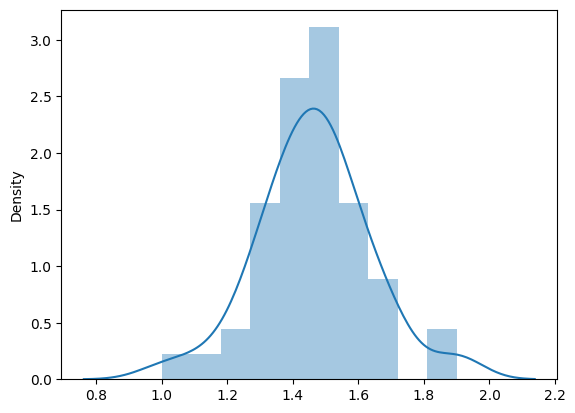

In [17]:
sns.distplot([iris_setosa['PL']])

## Density, not exact probability: For continuous data, you can't get the exact probability of a single point, but the PDF tells you how dense or likely values are in a small range.
## Shape of distribution: It lets you visualize whether your data clusters around a central value, spreads widely, or has skewed tendencies.
## Comparison of species or groups: In your notebook, when you use distplot (or ideally histplot or displot now), you’re essentially comparing the density of petal lengths across Iris species. More density at a particular length → more data points there.
### >SO pdf allows us to understand the probability of amount of density of a particular data 
### >It helps us to seperate the data and understand it's involvement and it's density as compared to the other data

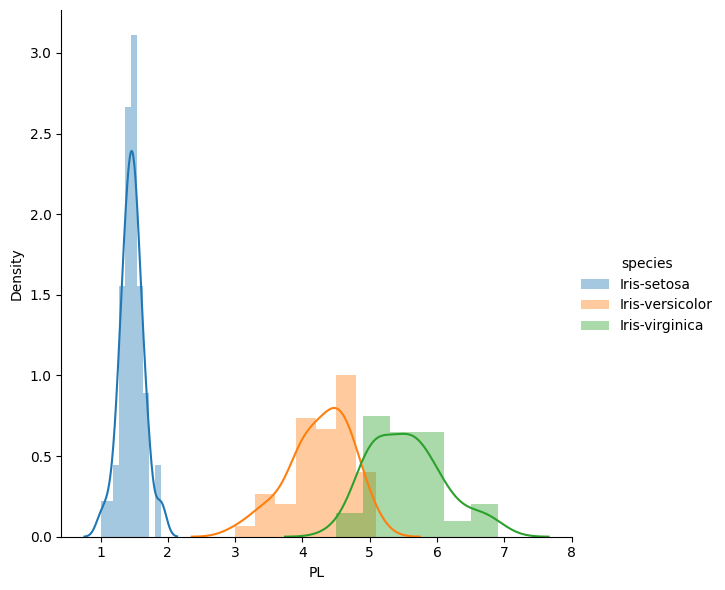

In [20]:
sns.FacetGrid(data, hue='species',height = 6).map(sns.distplot,'PL').add_legend()


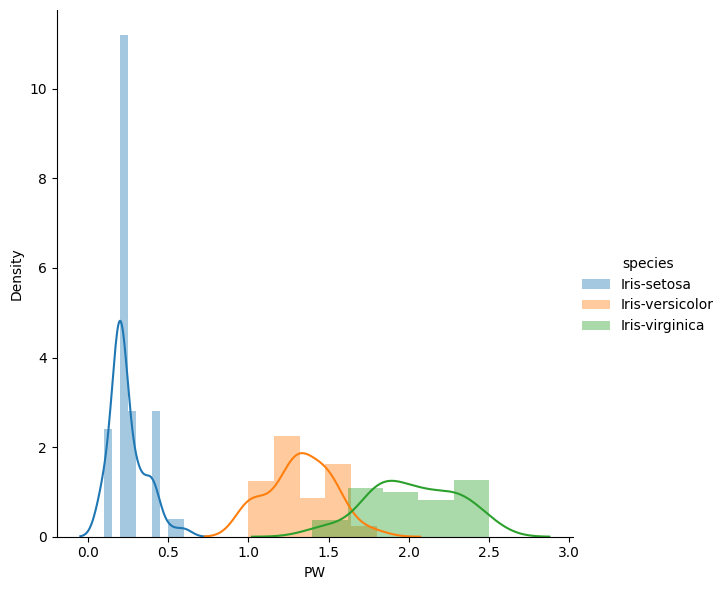

In [21]:
sns.FacetGrid(data, hue='species',height = 6).map(sns.distplot,'PW').add_legend()


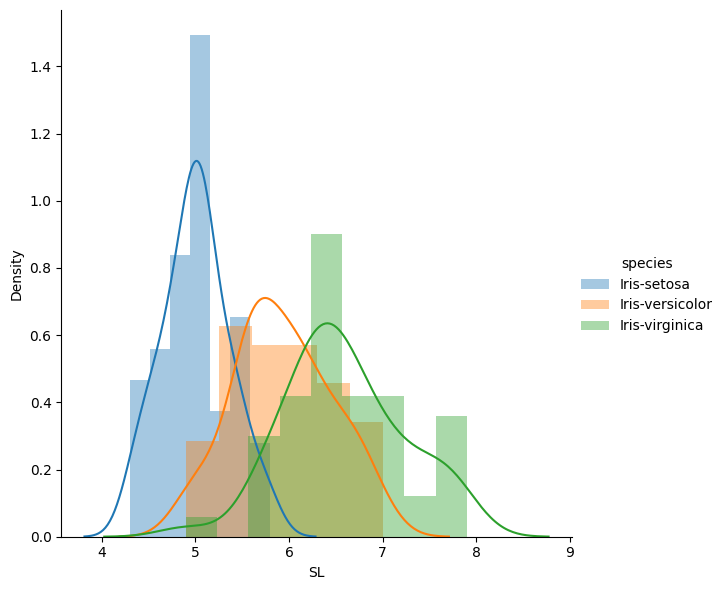

In [22]:
sns.FacetGrid(data, hue='species',height = 6).map(sns.distplot,'SL').add_legend()


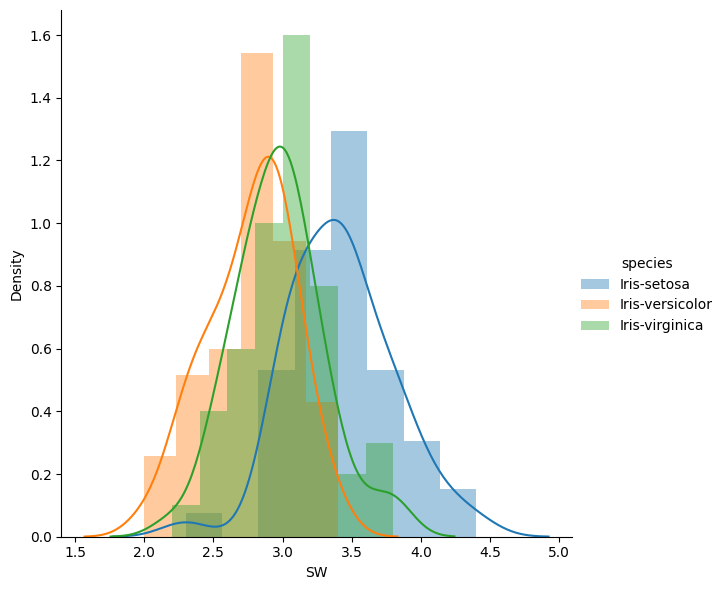

In [23]:
sns.FacetGrid(data, hue='species',height = 6).map(sns.distplot,'SW').add_legend()


# Cumulative Distribution Function

# 📈 What is a CDF?
## Cumulative probability: For a value 𝑥, the CDF gives you the probability that a randomly selected value from your data is less than or equal to 𝑥.
## Starts at 0, ends at 1: Since it accumulates probability, the CDF always starts at 0 (at the minimum data point) and reaches 1 (at the maximum).
## Smooth curve: The curve never dips—it always goes up or stays flat, reflecting accumulation.

## Compare distributions easily: You can see whether one species (e.g., Iris-setosa) tends to have smaller petal lengths compared to others by checking where the CDF curves rise.
## Quantile estimation: You can find values like the median (50th percentile) by locating the point on the x-axis where the curve hits 0.5.
## Cleaner interpretation: Especially useful when you're comparing spread, central tendency, or outliers among groups.

In [40]:
counts,bin_edges = np.histogram(iris_setosa['PL'],bins=10)
counts


array([ 1,  1,  2,  7, 12, 14,  7,  4,  0,  2])

In [42]:
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


Text(0, 0.5, '%age Of Probabilty')

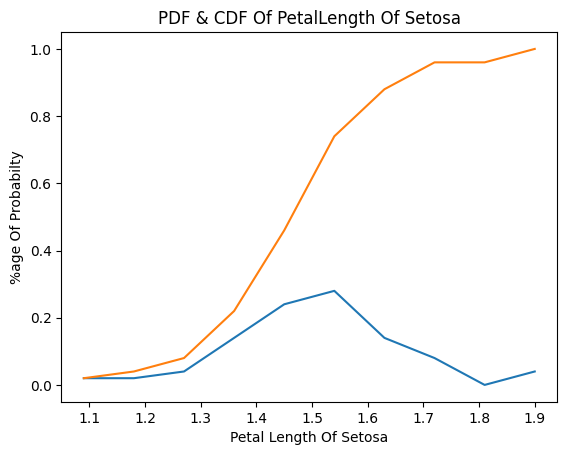

In [45]:
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF & CDF Of PetalLength Of Setosa')
plt.xlabel('Petal Length Of Setosa')
plt.ylabel('%age Of Probabilty')

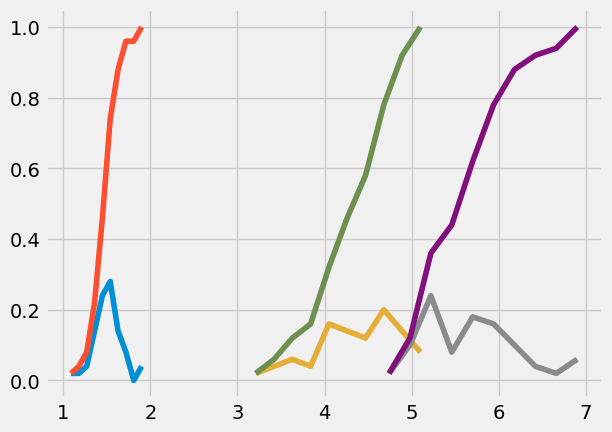

In [48]:
plt.style.use('fivethirtyeight')
counts,bin_edges = np.histogram(iris_setosa['PL'],bins=10)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(iris_versicolor['PL'],bins=10)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(iris_virginica['PL'],bins=10)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)